## Decession Tree Classifier to predict Urban or Not Urban

In [1]:
# At first, import the necessary libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [2]:
# Reading Carseats.csv
df = pd.read_csv("Carseats.csv")

In [3]:
print('First 5 rows of data:')
df.head()

First 5 rows of data:


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
# Checking number of columns and rows
df.shape

(400, 11)

#### Observation :
The training data has 400 observations and 11 features including the Urban (the label we want to predict).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### Observation :
1 feature with floating point number

7 features with integer number

3 features with object type

In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
# Check if there were any Null Values

df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [8]:
# Check if any duplicate values were Present

df.duplicated().sum()

0

### Feature Engineering

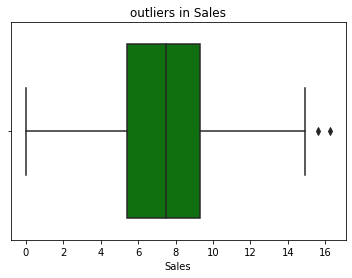

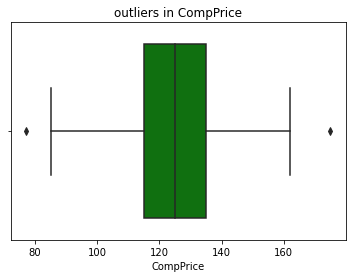

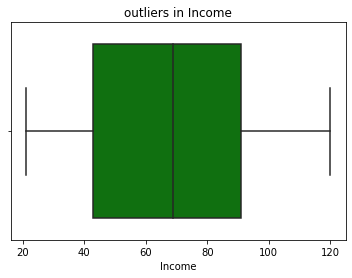

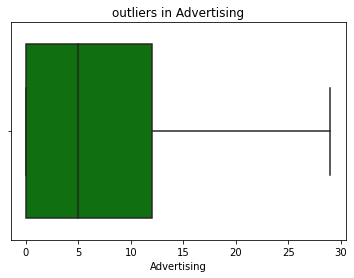

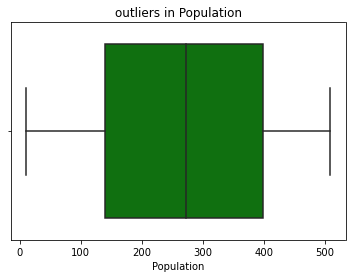

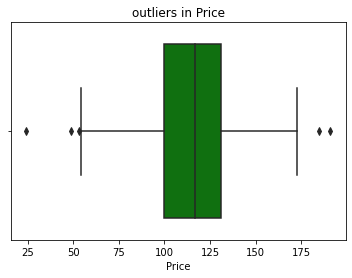

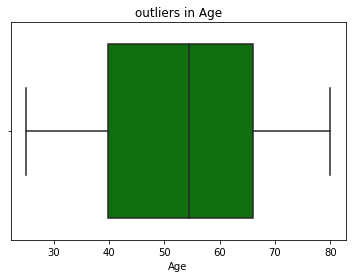

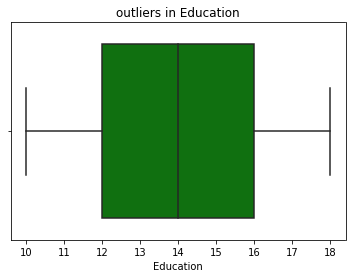

In [9]:
for i in df.columns:
    if i not in ["ShelveLoc","Urban","US"]:
        sns.boxplot(df[i],color="g")
        plt.title("outliers in "+i)
        plt.show()

#### Observations:
There were few Outliers in Sales, CompPrice and Price

In [10]:
# Remove the outliers

outliers=["Sales","CompPrice","Price"]

In [11]:
for i in outliers:
    minimum,q1,middle,q3,maximum=np.quantile(df[i],[0,0.25,0.50,0.75,1])
    IQR=q3-q1
    lower_fence=q1-(IQR*1.5)
    higher_fence=q3+(IQR*1.5)
    print("In "+i+" Column any values beyond the Range "+str(lower_fence)+" and "+str(higher_fence)+" are outliers")

In Sales Column any values beyond the Range -0.504999999999999 and 15.215 are outliers
In CompPrice Column any values beyond the Range 85.0 and 165.0 are outliers
In Price Column any values beyond the Range 53.5 and 177.5 are outliers


In [12]:
# Filter Outliers in Sales column

df=df[df["Sales"]<=15.215]

In [13]:
df.shape

(398, 11)

In [14]:
# Filter CompPrice Column
df=df[(df["CompPrice"]>=85.0) & (df["CompPrice"]<=165.0)]

In [15]:
df.shape

(396, 11)

In [16]:
# Filter in Price column
df=df[(df["Price"]>=53.5) & (df["Price"]<=177.5)]

In [17]:
df.shape

(392, 11)

### EDA

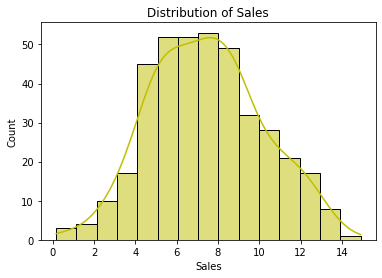

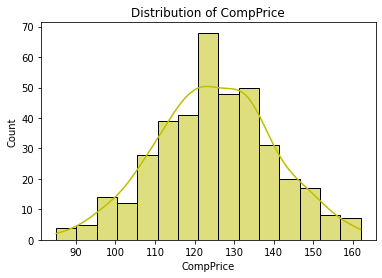

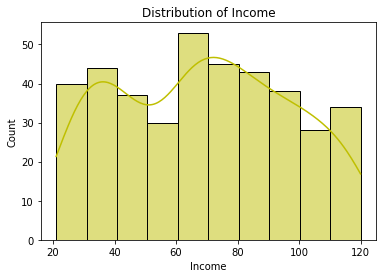

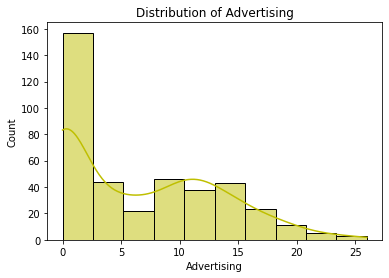

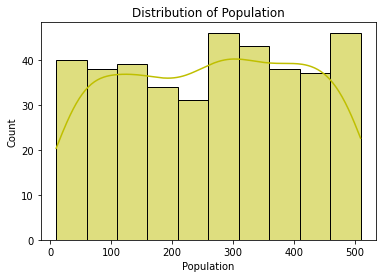

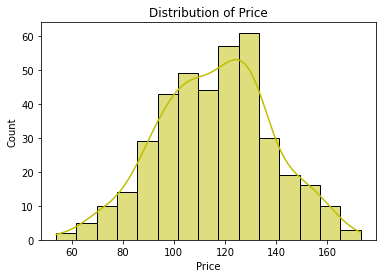

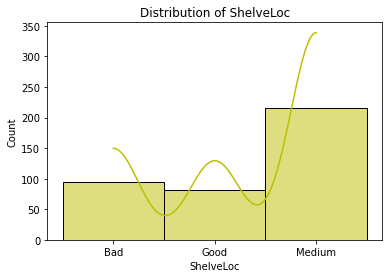

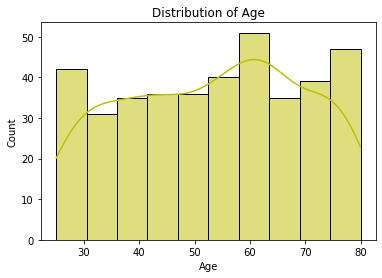

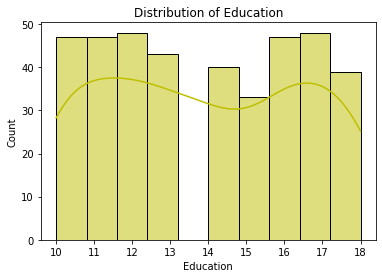

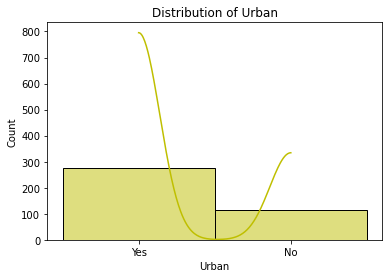

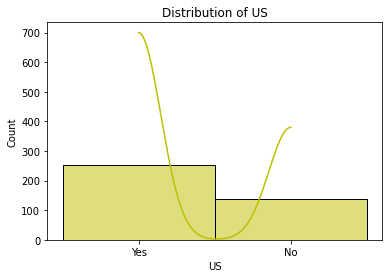

In [18]:
# View Data Distribution of all the features

for i in df.columns:
    sns.histplot(df[i],kde=True,color="y")
    plt.title("Distribution of "+i)
    plt.show()

#### Observations:
Sales , CompPrice and Price were normally Distributed.

Advertising is Right Skewed

#### Decoding Features - Converting categorical feauters into numbers

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder=LabelEncoder()

In [21]:
# Applying labelencodeing to shelveloc, us and Urban_c features

df["ShelveLoc"]=encoder.fit_transform(df["ShelveLoc"])

df["US"]=encoder.fit_transform(df["US"])

df["Urban_c"]=encoder.fit_transform(df["Urban"])

In [22]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,9.50,138,73,11,276,120,0,42,17,Yes,1,1
1,11.22,111,48,16,260,83,1,65,10,Yes,1,1
2,10.06,113,35,10,269,80,2,59,12,Yes,1,1
3,7.40,117,100,4,466,97,2,55,14,Yes,1,1
4,4.15,141,64,3,340,128,0,38,13,Yes,0,1


### Feature Coreleations

<AxesSubplot:>

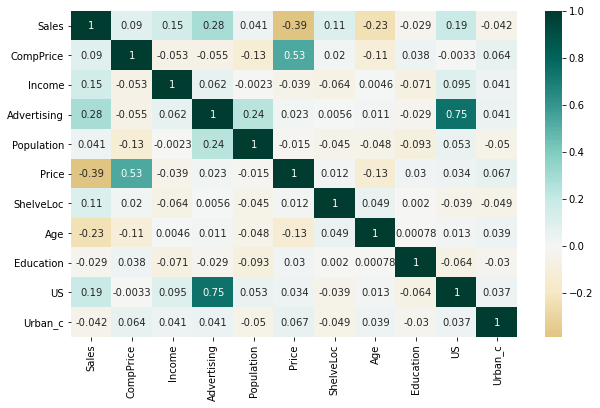

In [23]:
#Calculating correlation between each pair of variables
corr_matrix=df.corr(method="spearman")

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap='BrBG', center=0,annot=True)

#### From our heatmap above, we can infer the following:
    
   * Feature "US " and "Advertising" have a strong positive correlation with a value of 0.75
   * Feature "Price " and "CompPrice" have a positive correlation with a value of 0.53

### Checking and Handling Imbalanced Dataset

In [24]:
from sklearn.utils import resample

In [25]:
major=df[df["Urban"]=="Yes"]

In [26]:
major.shape

(276, 12)

In [27]:
minor=df[df["Urban"]=="No"]

In [28]:
minor.shape

(116, 12)

In [29]:
minor_new=resample(minor,replace=True,n_samples=len(major),random_state=42)

In [30]:
minor_new.shape

(276, 12)

In [31]:
df=pd.concat([minor_new,major])

In [32]:
df.shape

(552, 12)

In [33]:
df['Urban'].value_counts()

No     276
Yes    276
Name: Urban, dtype: int64

<AxesSubplot:xlabel='Urban', ylabel='count'>

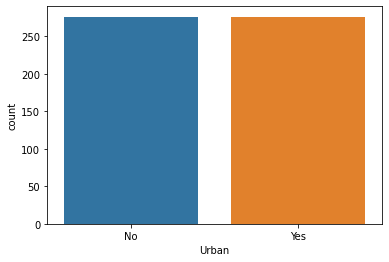

In [34]:
sns.countplot(df['Urban'])

In [35]:
df=df.sample(frac=1)

In [36]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
197,2.52,124,61,0,333,138,2,76,16,Yes,0,1
218,9.70,138,61,12,156,120,2,25,14,Yes,1,1
9,4.69,132,113,0,131,124,2,76,17,No,1,0
344,8.43,138,80,0,108,126,1,70,13,No,1,0
317,6.41,142,30,0,472,136,1,80,15,No,0,0


In [37]:
df.reset_index(inplace=True)

In [38]:
df.head()

,index,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,197,2.52,124,61,0,333,138,2,76,16,Yes,0,1
1,218,9.70,138,61,12,156,120,2,25,14,Yes,1,1
2,9,4.69,132,113,0,131,124,2,76,17,No,1,0
3,344,8.43,138,80,0,108,126,1,70,13,No,1,0
4,317,6.41,142,30,0,472,136,1,80,15,No,0,0


In [39]:
# dropping index column as its not required
df.drop("index",axis=1,inplace=True)

In [40]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Urban_c
0,2.52,124,61,0,333,138,2,76,16,Yes,0,1
1,9.70,138,61,12,156,120,2,25,14,Yes,1,1
2,4.69,132,113,0,131,124,2,76,17,No,1,0
3,8.43,138,80,0,108,126,1,70,13,No,1,0
4,6.41,142,30,0,472,136,1,80,15,No,0,0


In [41]:
df.shape

(552, 12)

### Spliting Independent and Dependent Features

In [42]:
# x - has independent features

x=df.drop(["Urban","Urban_c"],axis=1)

In [43]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US
0,2.52,124,61,0,333,138,2,76,16,0
1,9.70,138,61,12,156,120,2,25,14,1
2,4.69,132,113,0,131,124,2,76,17,1
3,8.43,138,80,0,108,126,1,70,13,1
4,6.41,142,30,0,472,136,1,80,15,0


In [44]:
# y - has dependent feature Urban

y=df['Urban']

In [45]:
y.head()

0    Yes
1    Yes
2     No
3     No
4     No
Name: Urban, dtype: object

### Scaling the Independent Features

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
x_new=scaler.fit_transform(x)

In [49]:
x=pd.DataFrame(x_new,columns=x.columns)

In [50]:
x.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US
0,-1.867736,-0.077678,-0.302451,-1.046650,0.398971,1.091375,0.760767,1.369212,0.789721,-1.353059
1,0.709112,0.917840,-0.302451,0.765428,-0.753189,0.272349,0.760767,-1.676463,0.018853,0.739066
2,-1.088940,0.491189,1.482773,-1.046650,-0.915924,0.454355,0.760767,1.369212,1.175156,0.739066
3,0.253318,0.917840,0.349843,-1.046650,-1.065639,0.545358,-0.467138,1.010898,-0.366582,0.739066
4,-0.471645,1.202274,-1.366719,-1.046650,1.303774,1.000372,-0.467138,1.608089,0.404287,-1.353059


### Split the Training and Testing Data

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [79]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((414, 10), (414,), (138, 10), (138,))

### Build the Model

In [80]:
model=DecisionTreeClassifier()

In [81]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

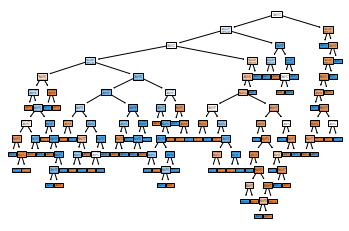

In [82]:
tree.plot_tree(model,filled=True)
plt.show()

In [83]:
y_pred=model.predict(x_test)

In [84]:
y_pred

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No'], dtype=object)

### Measure the metrics

Text(33.0, 0.5, 'Predicted')

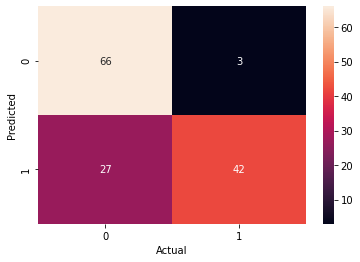

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.71      0.96      0.81        69
         Yes       0.93      0.61      0.74        69

    accuracy                           0.78       138
   macro avg       0.82      0.78      0.78       138
weighted avg       0.82      0.78      0.78       138



### Hyperparameter Tuning

In [87]:
grid={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[11,12,13],
  'max_features':['auto', 'sqrt', 'log2']
    
}

In [88]:
clf=GridSearchCV(model,param_grid=grid,cv=5)

In [89]:
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [11, 12, 13],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [90]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'splitter': 'best'}

In [91]:
model=DecisionTreeClassifier(criterion="gini",max_depth=13,max_features="auto",splitter="best")

In [92]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=13, max_features='auto')

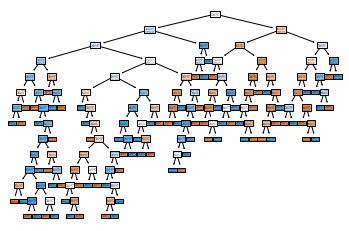

In [93]:
tree.plot_tree(model,filled=True)
plt.show()


In [94]:
y_pred=model.predict(x_test)

In [95]:
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'No'], dtype=object)

Text(33.0, 0.5, 'Predicted')

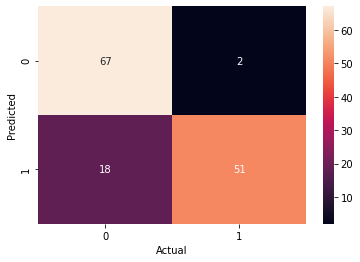

In [96]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [97]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.79      0.97      0.87        69
         Yes       0.96      0.74      0.84        69

    accuracy                           0.86       138
   macro avg       0.88      0.86      0.85       138
weighted avg       0.88      0.86      0.85       138



#### Observation:
Hyperparamter tuning given better results